# Importing Libraries

In [1]:
#Importing relevant libraries
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


# Loading dataset

In [2]:
#load training data

train_df = pd.read_csv("/content/drive/MyDrive/Airqo/Train.csv")
train_df.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle,pm2_5
0,id_vjcx08sz91,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-10-25,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.015000
1,id_bkg215syli,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-02,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.267200
2,id_oui2pot3qd,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-03,13,NaN,NaN,...,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269,39.450741
3,id_9aandqzy4n,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-08,14,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.537600
4,id_ali5x2m4iw,6531a46a89b3300013914a36,6.53257,3.39936,Lagos,Nigeria,2023-11-09,13,0.000267,0.774656,...,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355,19.431731


In [3]:
#load test data

test_df =pd.read_csv("/content/drive/MyDrive/Airqo/Test.csv")
test_df.head()

,id,site_id,site_latitude,site_longitude,city,country,date,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,id_ihxgrbq8bw,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-06,13,-0.000072,0.762543,...,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,id_dg6s4fhiwe,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-07,13,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id_f7hwwtmuzp,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-08,13,-0.000051,1.004265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,id_ioese5awdg,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-09,12,NaN,NaN,...,46052.449219,6585.034668,52160.980469,5585.034668,29.145922,0.314945,70.680077,61.874222,-90.875603,11.865201
4,id_hdw320zpls,64f9d17ab9e98d001ac9e882,5.61252,-0.22955,Accra,Ghana,2023-09-20,12,-0.000634,0.632173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [4]:
# drop pm2_5 , id , site_id ,city	, country, 	date

X_train = train_df.drop("pm2_5", axis = 1).drop("id", axis = 1).drop("site_id", axis = 1).drop("city", axis = 1).drop("country", axis = 1).drop("date", axis = 1)
X_train.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,6.53257,3.39936,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.53257,3.39936,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.53257,3.39936,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45185.49959,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269
3,6.53257,3.39936,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.53257,3.39936,13,0.000267,0.774656,0.000207,0.223403,-97.811241,49.513344,-126.064468,...,86197.53125,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355


In [5]:
# create y_train

y_train = train_df["pm2_5"]
y_train.head()

0    12.015000
1    42.267200
2    39.450741
3    10.537600
4    19.431731
Name: pm2_5, dtype: float64

In [6]:
# drop id , site_id ,city	, country, 	date

X_test = test_df.drop("id", axis = 1).drop("site_id", axis = 1).drop("city", axis = 1).drop("country", axis = 1).drop("date", axis = 1)
X_test.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,5.61252,-0.22955,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,...,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,5.61252,-0.22955,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.61252,-0.22955,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.61252,-0.22955,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,46052.449219,6585.034668,52160.980469,5585.034668,29.145922,0.314945,70.680077,61.874222,-90.875603,11.865201
4,5.61252,-0.22955,12,-0.000634,0.632173,-0.000401,0.000000,70.066956,66.014107,-111.396515,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Check the shape of the data
X_train.shape , y_train.shape , X_test.shape

((8071, 74), (8071,), (2783, 74))

In [8]:
# fill in nan values
X_train_nan = X_train.fillna(X_train.mean(), inplace=False)
X_train_nan.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,6.53257,3.39936,13,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,51850.474269,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028
1,6.53257,3.39936,12,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,51850.474269,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028
2,6.53257,3.39936,13,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,45185.499590,6791.682888,51171.802486,5791.682829,11.816715,0.192757,-96.411890,61.045123,-121.307414,41.898269
3,6.53257,3.39936,14,0.000024,0.687295,0.000013,0.126581,2.120939,38.671939,-92.912582,...,51850.474269,6089.449805,58478.947647,5105.978072,16.885186,0.255501,-18.952179,45.881380,-84.811978,28.708028
4,6.53257,3.39936,13,0.000267,0.774656,0.000207,0.223403,-97.811241,49.513344,-126.064468,...,86197.531250,1451.050659,96215.906250,451.050598,10.521009,0.153114,-97.811241,49.513439,-126.064453,40.167355


In [9]:
# fill in nan values
X_test_nan = X_test.fillna(X_test.mean(), inplace=False)
X_test_nan.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,5.61252,-0.22955,13,-0.000072,0.762543,-0.000055,0.079645,-100.330299,26.926420,-86.879776,...,74217.403083,2710.544562,83569.504246,1710.544483,3.063105,0.263193,-100.317077,27.059646,-86.885670,25.530511
1,5.61252,-0.22955,13,0.000019,0.671654,0.000010,0.096423,-11.358700,40.219066,-86.105632,...,52628.887085,5915.129943,59255.860492,4942.499342,12.586550,0.263633,-17.920188,49.103404,-84.325586,29.873696
2,5.61252,-0.22955,13,-0.000051,1.004265,-0.000051,0.163160,73.117264,43.112466,-89.089083,...,52628.887085,5915.129943,59255.860492,4942.499342,12.586550,0.263633,-17.920188,49.103404,-84.325586,29.873696
3,5.61252,-0.22955,12,0.000019,0.671654,0.000010,0.096423,-11.358700,40.219066,-86.105632,...,46052.449219,6585.034668,52160.980469,5585.034668,29.145922,0.314945,70.680077,61.874222,-90.875603,11.865201
4,5.61252,-0.22955,12,-0.000634,0.632173,-0.000401,0.000000,70.066956,66.014107,-111.396515,...,52628.887085,5915.129943,59255.860492,4942.499342,12.586550,0.263633,-17.920188,49.103404,-84.325586,29.873696


In [10]:
X_train_nan.shape ,X_test_nan.shape

((8071, 74), (2783, 74))

# Model building and training

**Model 1**

In [11]:
# lets build a simple neural network
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_1.compile(
   loss = tf.keras.losses.mae,
   optimizer = tf.keras.optimizers.Adam(),
   metrics = [tf.keras.metrics.RootMeanSquaredError()]
)


#Fit the model
history_1 = model_1.fit(X_train_nan, y_train , epochs = 250)


Epoch 1/250
253/253 [==============================] - 1s 2ms/step - loss: 6386.1523 - root_mean_squared_error: 19940.8125
Epoch 2/250
253/253 [==============================] - 0s 2ms/step - loss: 459.1072 - root_mean_squared_error: 611.3995
Epoch 3/250
253/253 [==============================] - 0s 2ms/step - loss: 580.5544 - root_mean_squared_error: 707.3829
Epoch 4/250
253/253 [==============================] - 0s 2ms/step - loss: 532.8269 - root_mean_squared_error: 709.3209
Epoch 5/250
253/253 [==============================] - 0s 2ms/step - loss: 456.8239 - root_mean_squared_error: 596.0609
Epoch 6/250
253/253 [==============================] - 0s 2ms/step - loss: 434.9763 - root_mean_squared_error: 558.6450
Epoch 7/250
253/253 [==============================] - 0s 2ms/step - loss: 495.5869 - root_mean_squared_error: 636.6609
Epoch 8/250
253/253 [==============================] - 0s 2ms/step - loss: 420.1003 - root_mean_squared_error: 509.0490
Epoch 9/250
253/253 [================

**Let's experiment finding the ideal rate and then create model 2**

In [12]:
# lets build a simple neural network
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])


# Compile the model

model_2.compile(
   loss = tf.keras.losses.mae,
   optimizer = tf.keras.optimizers.Adam(),
   metrics = [tf.keras.metrics.RootMeanSquaredError()]
)


#Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10** (epoch/20))

#Fit the model
history_2 = model_2.fit(X_train_nan, y_train ,callbacks = [lr_scheduler], epochs = 50
)

Epoch 1/50
253/253 [==============================] - 1s 2ms/step - loss: 96959.1484 - root_mean_squared_error: 117014.9297 - lr: 1.0000e-04
Epoch 2/50
253/253 [==============================] - 0s 2ms/step - loss: 1029.6515 - root_mean_squared_error: 1447.5289 - lr: 1.1220e-04
Epoch 3/50
253/253 [==============================] - 0s 2ms/step - loss: 572.8250 - root_mean_squared_error: 867.4016 - lr: 1.2589e-04
Epoch 4/50
253/253 [==============================] - 0s 2ms/step - loss: 303.4720 - root_mean_squared_error: 597.1367 - lr: 1.4125e-04
Epoch 5/50
253/253 [==============================] - 0s 2ms/step - loss: 288.8310 - root_mean_squared_error: 588.4524 - lr: 1.5849e-04
Epoch 6/50
253/253 [==============================] - 0s 2ms/step - loss: 279.0775 - root_mean_squared_error: 578.1064 - lr: 1.7783e-04
Epoch 7/50
253/253 [==============================] - 0s 2ms/step - loss: 296.4173 - root_mean_squared_error: 583.0883 - lr: 1.9953e-04
Epoch 8/50
253/253 [=====================

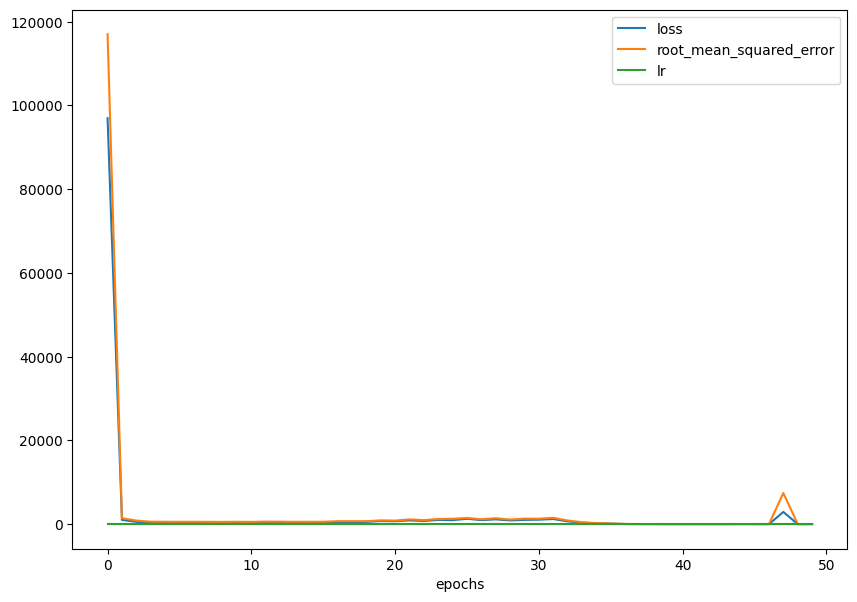

In [13]:
# Check the hsitory
pd.DataFrame(history_2.history).plot(figsize = (10,7), xlabel = "epochs");

Text(0.5, 1.0, 'learning rate vs Loss')

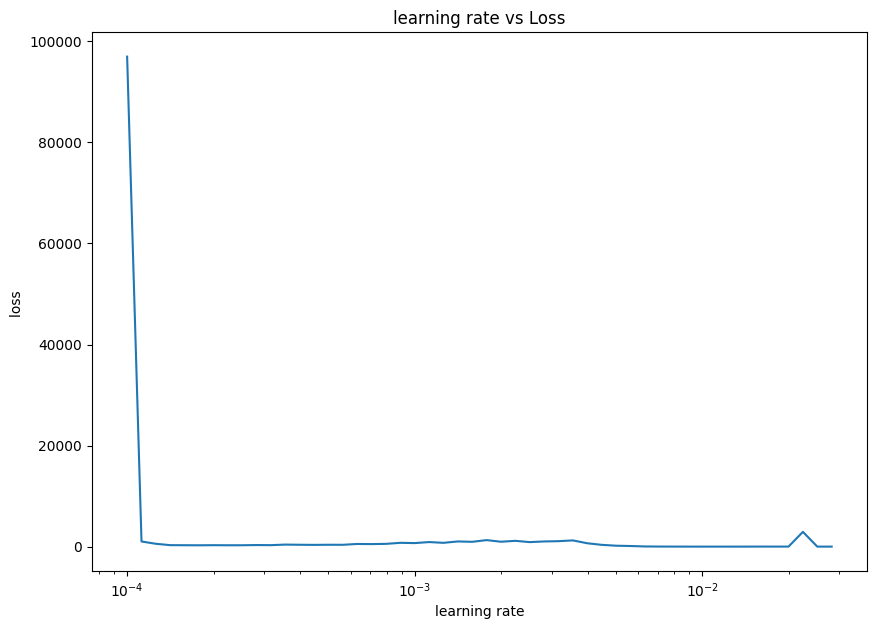

In [14]:
#plot the learning rate versus the loss

lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure (figsize = (10,7))
plt.semilogx(lrs , history_2.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss ")
plt.title("learning rate vs Loss")

In [15]:
10**-2

0.01

**Lets create model 3 with the ideal learning rate**

In [16]:
# lets build a simple neural network
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_3.compile(
   loss = tf.keras.losses.mae,
   optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
   metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

#Fit the model
history_3 = model_3.fit(X_train_nan, y_train , epochs = 40)


Epoch 1/40
253/253 [==============================] - 1s 2ms/step - loss: 8481.7852 - root_mean_squared_error: 13052.9229
Epoch 2/40
253/253 [==============================] - 0s 2ms/step - loss: 3726.8452 - root_mean_squared_error: 4299.5581
Epoch 3/40
253/253 [==============================] - 0s 2ms/step - loss: 3652.7808 - root_mean_squared_error: 3890.1680
Epoch 4/40
253/253 [==============================] - 0s 2ms/step - loss: 3407.1101 - root_mean_squared_error: 3800.1953
Epoch 5/40
253/253 [==============================] - 0s 2ms/step - loss: 2826.4417 - root_mean_squared_error: 3071.6355
Epoch 6/40
253/253 [==============================] - 0s 2ms/step - loss: 1758.7297 - root_mean_squared_error: 1919.2174
Epoch 7/40
253/253 [==============================] - 0s 2ms/step - loss: 557.6296 - root_mean_squared_error: 662.6041
Epoch 8/40
253/253 [==============================] - 0s 2ms/step - loss: 695.4177 - root_mean_squared_error: 927.6617
Epoch 9/40
253/253 [===============

**Lets experiment Normalising and standardising the data and then create model 4**

In [17]:
#let us normalise the X_train_nan, X_test_nan and y_train

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_train_nan_norm = scaler.fit_transform(X_train_nan)
X_test_nan_norm = scaler.fit_transform(X_test_nan)
y_train_nan_norm = scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)) #couldnt tranform a series object so i converted to numpy and reshaped , then scaled


# Convert the normalized data back to a DataFrame
normalized_df_X_train = pd.DataFrame(X_train_nan_norm, columns=X_train_nan.columns)
normalized_df_X_test = pd.DataFrame(X_test_nan_norm, columns=X_test_nan.columns)
normalised_series_y_train =tf.squeeze(tf.constant(y_train_nan_norm)) # converted to a tensor and then squeezed to create a normalised tensor of shape 8071,


In [18]:
normalized_df_X_train.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,0.993752,0.005869,0.75,0.334118,0.296654,0.394132,0.422147,0.593587,0.582745,0.505449,...,0.495037,0.332099,0.529374,0.313076,0.062069,0.503832,0.465233,0.678103,0.542709,0.522806
1,0.993752,0.005869,0.50,0.334118,0.296654,0.394132,0.422147,0.593587,0.582745,0.505449,...,0.495037,0.332099,0.529374,0.313076,0.062069,0.503832,0.465233,0.678103,0.542709,0.522806
2,0.993752,0.005869,0.75,0.334118,0.296654,0.394132,0.422147,0.593587,0.582745,0.505449,...,0.418094,0.373983,0.448325,0.355201,0.041676,0.312190,0.034963,0.917876,0.275945,0.897726
3,0.993752,0.005869,1.00,0.334118,0.296654,0.394132,0.422147,0.593587,0.582745,0.505449,...,0.495037,0.332099,0.529374,0.313076,0.062069,0.503832,0.465233,0.678103,0.542709,0.522806
4,0.993752,0.005869,0.75,0.414871,0.363459,0.502102,0.745049,0.053503,0.746865,0.273424,...,0.891552,0.055449,0.947943,0.027111,0.036463,0.191105,0.027190,0.735534,0.241173,0.848527


In [19]:
normalized_df_X_test.head()

,site_latitude,site_longitude,hour,sulphurdioxide_so2_column_number_density,sulphurdioxide_so2_column_number_density_amf,sulphurdioxide_so2_slant_column_number_density,sulphurdioxide_cloud_fraction,sulphurdioxide_sensor_azimuth_angle,sulphurdioxide_sensor_zenith_angle,sulphurdioxide_solar_azimuth_angle,...,cloud_cloud_top_pressure,cloud_cloud_top_height,cloud_cloud_base_pressure,cloud_cloud_base_height,cloud_cloud_optical_depth,cloud_surface_albedo,cloud_sensor_azimuth_angle,cloud_sensor_zenith_angle,cloud_solar_azimuth_angle,cloud_solar_zenith_angle
0,0.993275,0.000885,0.75,0.265510,0.285486,0.388526,0.266512,0.013648,0.381832,0.550742,...,0.755940,0.143699,0.798395,0.122130,0.012239,0.599421,0.013369,0.380570,0.550684,0.480029
1,0.993275,0.000885,0.75,0.291780,0.218015,0.423405,0.322653,0.508373,0.590929,0.556163,...,0.486199,0.370375,0.510321,0.356500,0.068935,0.600552,0.474696,0.729215,0.568611,0.614733
2,0.993275,0.000885,0.75,0.271501,0.464929,0.390516,0.545973,0.978100,0.636443,0.535271,...,0.486199,0.370375,0.510321,0.356500,0.068935,0.600552,0.474696,0.729215,0.568611,0.614733
3,0.993275,0.000885,0.50,0.291780,0.218015,0.423405,0.322653,0.508373,0.590929,0.556163,...,0.404029,0.417760,0.426259,0.403094,0.167519,0.732367,0.970755,0.931199,0.522745,0.056197
4,0.993275,0.000885,0.50,0.103047,0.188706,0.202611,0.000000,0.961139,0.996692,0.379057,...,0.486199,0.370375,0.510321,0.356500,0.068935,0.600552,0.474696,0.729215,0.568611,0.614733


In [20]:
normalised_series_y_train


<tf.Tensor: shape=(8071,), dtype=float64, numpy=
array([0.02376958, 0.0902589 , 0.08406879, ..., 0.03050594, 0.03698241,
       0.02616082])>

In [21]:
normalized_df_X_train.shape

(8071, 74)

In [22]:
normalized_df_X_test.shape

(2783, 74)

In [23]:
# Create model and fit on unnormalised labels

# lets build a simple neural network
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_4.compile(
   loss = tf.keras.losses.mae,
   optimizer = tf.keras.optimizers.Adam(),
   metrics = [tf.keras.metrics.RootMeanSquaredError()]
)


#Fit the model
history_4 = model_4.fit(normalized_df_X_train, y_train , epochs = 250)

Epoch 1/250
253/253 [==============================] - 1s 2ms/step - loss: 15.0013 - root_mean_squared_error: 28.2374
Epoch 2/250
253/253 [==============================] - 1s 2ms/step - loss: 11.9656 - root_mean_squared_error: 25.5082
Epoch 3/250
253/253 [==============================] - 1s 2ms/step - loss: 11.7709 - root_mean_squared_error: 25.2528
Epoch 4/250
253/253 [==============================] - 1s 3ms/step - loss: 11.5612 - root_mean_squared_error: 24.9077
Epoch 5/250
253/253 [==============================] - 1s 2ms/step - loss: 11.3421 - root_mean_squared_error: 24.5660
Epoch 6/250
253/253 [==============================] - 1s 3ms/step - loss: 11.1552 - root_mean_squared_error: 24.2745
Epoch 7/250
253/253 [==============================] - 1s 3ms/step - loss: 10.9943 - root_mean_squared_error: 23.9996
Epoch 8/250
253/253 [==============================] - 1s 3ms/step - loss: 10.8729 - root_mean_squared_error: 23.8015
Epoch 9/250
253/253 [==============================] - 1

In [24]:
# Create model and fit on normalised labels

# lets build a simple neural network
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
#    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_5.compile(
   loss = tf.keras.losses.mae,
   optimizer = tf.keras.optimizers.Adam(),
   metrics = [tf.keras.metrics.RootMeanSquaredError()]
)


#Fit the model
history_5 = model_5.fit(normalized_df_X_train, normalised_series_y_train
                        , epochs = 10
                        #,validation_data =normalized_df_X_test
                        )

Epoch 1/10
253/253 [==============================] - 1s 2ms/step - loss: 0.1664 - root_mean_squared_error: 0.2347
Epoch 2/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0696 - root_mean_squared_error: 0.0976
Epoch 3/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0436 - root_mean_squared_error: 0.0675
Epoch 4/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0332 - root_mean_squared_error: 0.0581
Epoch 5/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0291 - root_mean_squared_error: 0.0548
Epoch 6/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0272 - root_mean_squared_error: 0.0535
Epoch 7/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0260 - root_mean_squared_error: 0.0528
Epoch 8/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0252 - root_mean_squared_error: 0.0522
Epoch 9/10
253/253 [==============================] - 0s 2ms/step - loss: 0.0246

In [25]:
# Experiment diviving the training set into train and valid

seg_X_train = normalized_df_X_train.iloc[:6750]
seg_X_valid = normalized_df_X_train.iloc[6750:]

seg_y_train = normalised_series_y_train[:6750]
seg_y_valid = normalised_series_y_train[6750:]

# Create model and fit on normalised labels

# lets build a simple neural network
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
#    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

# Compile the model

model_6.compile(
   loss = tf.keras.losses.mae,
   optimizer = tf.keras.optimizers.Adam(),
   metrics = [tf.keras.metrics.RootMeanSquaredError()]
)


#Fit the model
history_6 = model_6.fit(seg_X_train, seg_y_train,
                        epochs = 10,
                        validation_data = (seg_X_valid,seg_y_valid)
                        )

Epoch 1/10
211/211 [==============================] - 2s 4ms/step - loss: 0.1972 - root_mean_squared_error: 0.2715 - val_loss: 0.1044 - val_root_mean_squared_error: 0.1335
Epoch 2/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0846 - root_mean_squared_error: 0.1174 - val_loss: 0.0665 - val_root_mean_squared_error: 0.0856
Epoch 3/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0592 - root_mean_squared_error: 0.0871 - val_loss: 0.0488 - val_root_mean_squared_error: 0.0636
Epoch 4/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0459 - root_mean_squared_error: 0.0731 - val_loss: 0.0407 - val_root_mean_squared_error: 0.0530
Epoch 5/10
211/211 [==============================] - 1s 3ms/step - loss: 0.0390 - root_mean_squared_error: 0.0665 - val_loss: 0.0322 - val_root_mean_squared_error: 0.0426
Epoch 6/10
211/211 [==============================] - 0s 2ms/step - loss: 0.0336 - root_mean_squared_error: 0.0617 - val_loss: 0.0287 - val_

# Visualise the model results

<Axes: >

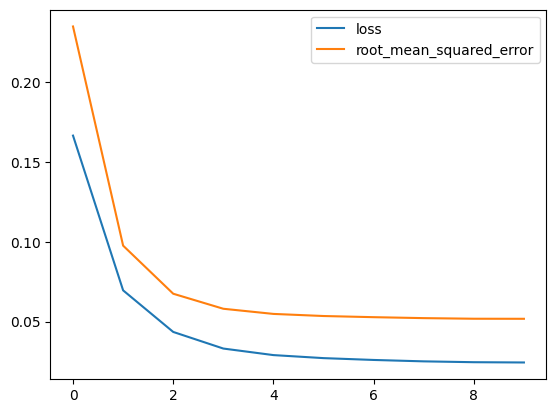

In [26]:
# visualise only training
pd.DataFrame(history_5.history).plot()

<Axes: >

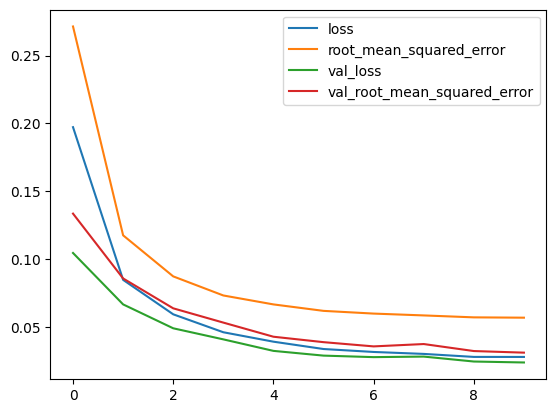

In [27]:
#visualise training and validation
pd.DataFrame(history_6.history).plot()

# Submission

In [51]:
# Make predictions on the test set
preds = model_6.predict(X_test_nan_norm)
preds , len(preds) , preds.shape




87/87 [==============================] - 0s 2ms/step


(array([[0.07557416],
        [0.03808174],
        [0.0118751 ],
        ...,
        [0.10815131],
        [0.10700491],
        [0.07803151]], dtype=float32),
 2783,
 (2783, 1))

In [38]:
# # Step 5: Unnormalize the predictions
# unnormalized_preds = tf.squeeze(scaler.inverse_transform(preds))
# unnormalized_preds , unnormalized_preds.shape

(<tf.Tensor: shape=(2783,), dtype=float32, numpy=
 array([35.58574  , 18.52694  ,  6.6030917, ..., 50.408123 , 49.88652  ,
        36.703815 ], dtype=float32)>,
 TensorShape([2783]))

In [52]:
import numpy as np

# Step 5: Unnormalize the predictions
unnormalized_preds = scaler.inverse_transform(preds)

# Convert to 1D array if necessary
unnormalized_preds = np.squeeze(unnormalized_preds)

# Round the values to 1 decimal place
unnormalized_preds_rounded = np.round(unnormalized_preds, 1)

# Display the unnormalized and rounded predictions
unnormalized_preds_rounded, unnormalized_preds_rounded.shape


(array([35.6, 18.5,  6.6, ..., 50.4, 49.9, 36.7], dtype=float32), (2783,))

In [53]:
# Create submission file
sub = pd.DataFrame({'id': test_df['id'], 'pm2_5': unnormalized_preds_rounded})

# Preview sub file
sub

,id,pm2_5
0,id_ihxgrbq8bw,35.6
1,id_dg6s4fhiwe,18.5
2,id_f7hwwtmuzp,6.6
3,id_ioese5awdg,26.7
4,id_hdw320zpls,11.0
...,...,...
2778,id_5yblexf7zp,23.5
2779,id_c9cycuvetl,46.0
2780,id_8xu1ardxni,50.4
2781,id_aumy97t1iu,49.9


In [55]:
# Create a csv file
sub.to_csv('submission.csv', index = False)